In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import metapack as mp
from pathlib import Path
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt

# /Users/eric/opt/anaconda3/envs/data/lib/python3.7/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
# The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
#   layout[ax.rowNum, ax.colNum] = ax.get_visible()
import warnings
warnings.simplefilter("ignore")

sns.set()

%run ./lib.py

In [2]:
df = pd.read_csv('scf16.csv')
df = df[df.race.isin(['white','black'])]
df.head().T

,0,1,2,3,4
case_id,1,1,1,1,1
record_id,11,12,13,14,15
implicate_id,1,2,3,4,5
age_1,71,71,71,71,71
age_2,0,0,0,0,0
hisp,5,5,5,5,5
race,white,white,white,white,white
addtional_race,5,5,5,5,5
unusual_income,3,3,3,3,3
ed_1,assoc_vocational,assoc_vocational,assoc_vocational,assoc_vocational,assoc_vocational


In [26]:
# Count parent's bachelors degrees

def count_bach(r):
    return \
        int(r.ed_father_1 == 'bachelors') + \
        int(r.ed_father_2 == 'bachelors') + \
        int(r.ed_mother_1 == 'bachelors') + \
        int(r.ed_mother_2 == 'bachelors')
 
df['n_bach'] = df.apply(count_bach, axis=1)


In [43]:
# Convert percentile category codes into percentile numbers
# 0 10 20 30 40 50 60 70 80 90 95 99
bc = pd.CategoricalDtype(ordered=True)
df['nincpctle'] = df.nincpctlecat.astype(bc).cat.rename_categories([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 95, 99])
df['ninc'] = df.ninccat.astype(bc).cat.rename_categories([0,20,40,60,80,90])
df['nwpctle'] = df.nwpctlecat.astype(bc).cat.rename_categories([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 95, 99])

df['agecl'] = df.agecl.astype('category').cat.rename_categories({1:'<35', 2:'35-44', 3:'45-54', 4:'55-64', 5:'65-74', 6:'>=75'})
df['edcl'] = df.edcl.astype('category').cat.rename_categories({1:'No HS', 2:'HS/GED', 3:'Some College', 4:'College'})

df.agecl.cat.categories

Index(['<35', '35-44', '45-54', '55-64', '65-74', '>=75'], dtype='object')

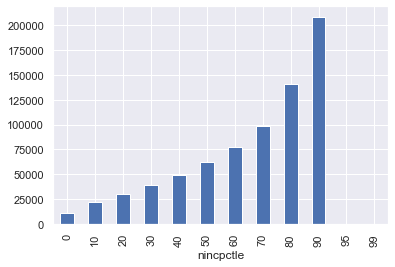

In [5]:
df[df.nincpctle<95].groupby('nincpctle').norminc.mean().plot.bar()

In [45]:
dfs = make_sample(df, extra_cols=['ninc', 'nincpctle' ,'homeeq','debt','equity', 'nfin', 'married', 'n_bach' ])
dfs.head()

,case_id,record_id,race,age_1,agecl,norminc,networth,asset,gi_sum,occat1,...,ninc,nincpctle,homeeq,debt,equity,nfin,married,n_bach,income_decile,gi_sum_decile
8459,1696,16965,black,47,45-54,40505.456634,48700.0,61200.0,0,1,...,20,30,0.0,12500.0,7800.0,5900.0,2,0,3,0.0
9537,1912,19123,white,31,<35,75947.731189,-17760.0,216550.0,0,1,...,60,60,4000.0,234310.0,0.0,213800.0,1,2,6,0.0
22319,4474,44745,white,23,<35,37467.547387,154400.0,161800.0,0,1,...,20,30,0.0,7400.0,13100.0,43800.0,2,0,3,0.0
10612,2127,21273,white,49,45-54,195438.828260,2093000.0,2422000.0,0,2,...,90,90,250000.0,329000.0,65000.0,2291000.0,1,3,9,0.0
30323,6077,60774,white,69,65-74,59745.548535,476000.0,553000.0,0,3,...,40,50,253000.0,77000.0,101500.0,342000.0,2,0,5,0.0


In [30]:
dfs.n_bach.value_counts()

0    6154985
1    2036677
2    1251539
3     354785
4     202014
Name: n_bach, dtype: int64

In [8]:
dfs.groupby('race').networth.median()

race
black     16300.0
white    162600.0
Name: networth, dtype: float64

In [9]:
x = df.groupby('race').apply(wmedian,'networth')
print(x.white/x.black)
x

9.985889570552148


race
black     16300.0
white    162770.0
dtype: float64

In [10]:
x = df[df.gi_sum <= 0].groupby('race').apply(wmedian,'networth')
print(x.white/x.black)

9.648760330578513


In [11]:
t = dfs.groupby(['agecl','famstruct', 'nincpctle', 'race']).networth.median().unstack()
t = (t.white/t.black)
t = t[(t<10) & (t>0)]
t.mean()

2.431190222858261

In [36]:
def wb_rmse(t):
    """ White/Black Root Mean Squared Error"""
    return np.mean(np.sqrt(((t.white - t.black)/t.white)**2))

0.709506888518855

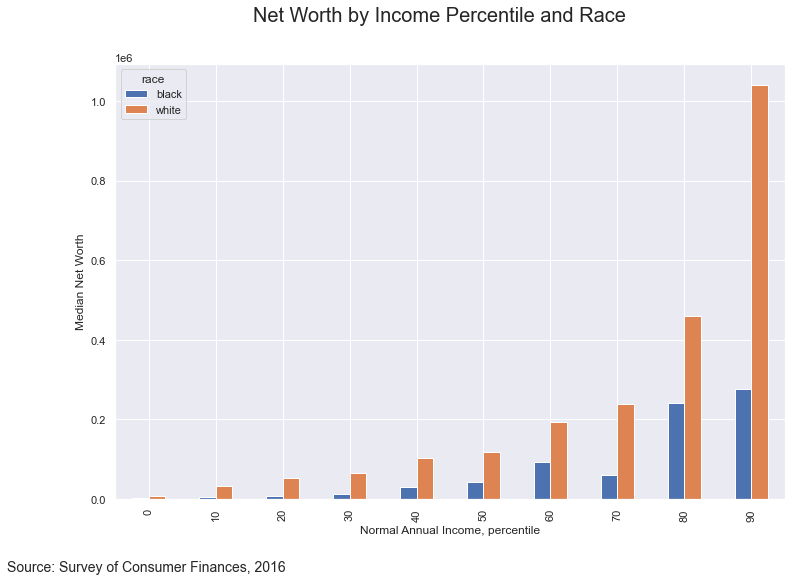

In [13]:
fig, ax = plt.subplots(figsize=(12,8))

fig.suptitle('Net Worth by Income Percentile and Race', fontsize=20)
t = dfs[dfs.nincpctle<95].groupby(['nincpctle', 'race']).networth.median().unstack()

t.plot.bar(ax=ax)
plt.gcf().text(0,0, f"Source: Survey of Consumer Finances, 2016", fontsize=14) 
ax.set_xlabel('Normal Annual Income, percentile')
ax.set_ylabel('Median Net Worth');
wb_rmse(t)

In [14]:
nh = dfs[dfs.gi_sum == 0]  # "no help"
yh = dfs[dfs.gi_sum != 0] # " Yes help"

0.365605080595242

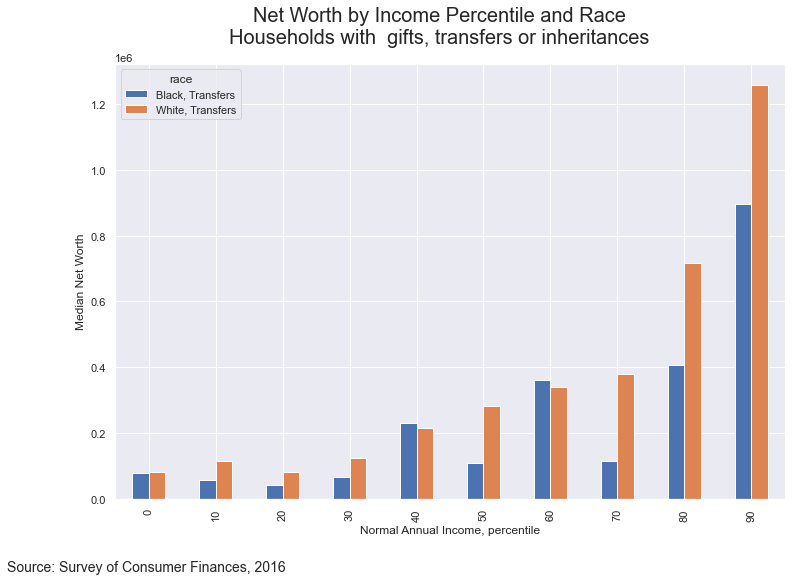

In [15]:
fig, ax = plt.subplots(figsize=(12,8))

fig.suptitle('Net Worth by Income Percentile and Race\nHouseholds with  gifts, transfers or inheritances', fontsize=20)

t = yh[yh.nincpctle<95].groupby(['nincpctle','race']).networth.median().unstack()
#t = t1.join(t2)

t.rename(columns={'white':'White, Transfers', 'black':'Black, Transfers'}).plot.bar(ax=ax)
plt.gcf().text(0,0, f"Source: Survey of Consumer Finances, 2016", fontsize=14) 
ax.set_xlabel('Normal Annual Income, percentile')
ax.set_ylabel('Median Net Worth');
wb_rmse(t)

0.6705947507100313

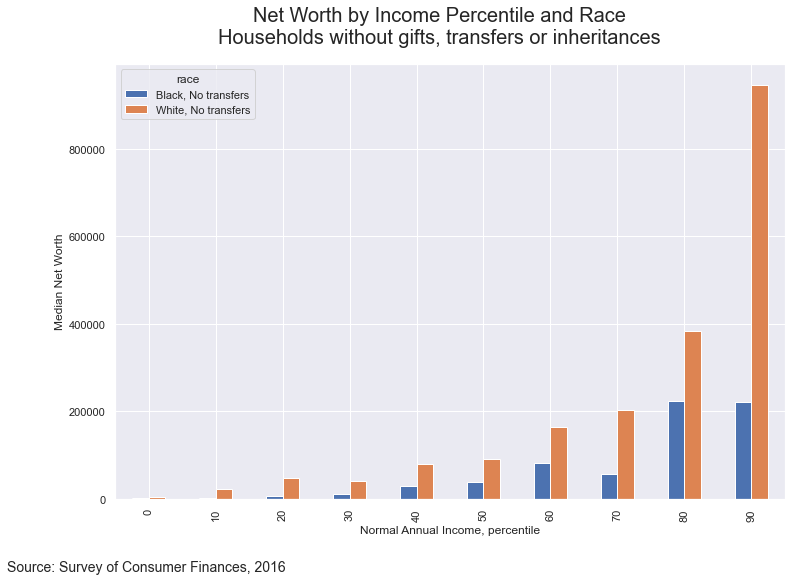

In [16]:
fig, ax = plt.subplots(figsize=(12,8))

fig.suptitle('Net Worth by Income Percentile and Race\nHouseholds without gifts, transfers or inheritances', fontsize=20)
t = nh[nh.nincpctle < 95]
t = t.groupby(['nincpctle','race']).networth.median().unstack()

t.rename(columns={'white':'White, No transfers', 'black':'Black, No transfers'}).plot.bar(ax=ax)
plt.gcf().text(0,0, f"Source: Survey of Consumer Finances, 2016", fontsize=14) 
ax.set_xlabel('Normal Annual Income, percentile')
ax.set_ylabel('Median Net Worth');
wb_rmse(t)

In [47]:
dfs.edcl.value_counts()/len(dfs)

College         0.351365
Some College    0.281162
HS/GED          0.267678
No HS           0.099795
Name: edcl, dtype: float64

0.8353354095786704

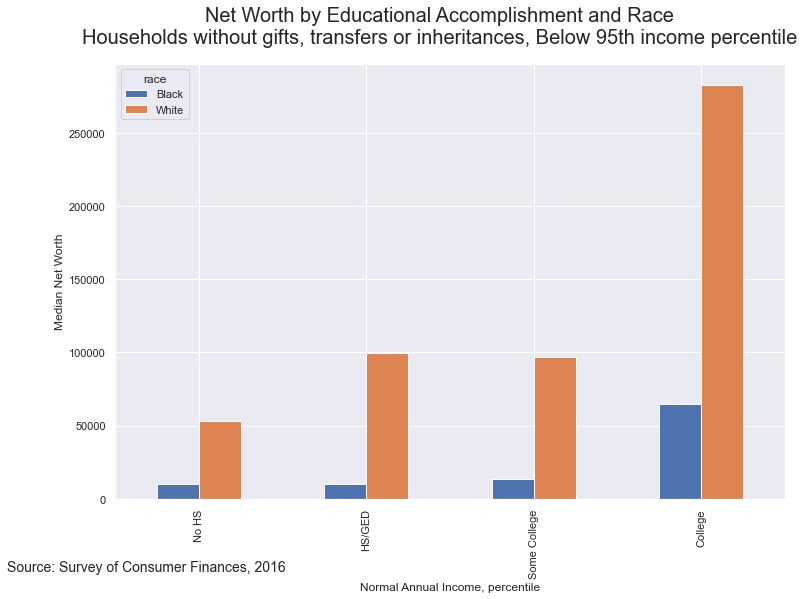

In [50]:
fig, ax = plt.subplots(figsize=(12,8))

fig.suptitle('Net Worth by Educational Accomplishment and Race\nHouseholds without gifts, transfers or inheritances, Below 95th income percentile', fontsize=20)
t = dfs[dfs.nincpctle < 95]
t = t.groupby(['edcl','race']).networth.median().unstack()

t.rename(columns={'white':'White', 'black':'Black'}).plot.bar(ax=ax)
plt.gcf().text(0,0, f"Source: Survey of Consumer Finances, 2016", fontsize=14) 
ax.set_xlabel('Normal Annual Income, percentile')
ax.set_ylabel('Median Net Worth');
wb_rmse(t)

In [53]:
t = dfs.groupby('race').networth.median().to_frame().T
wb_rmse(t)

0.9

In [56]:
(t.white - t.black)/t.white

networth    0.9
dtype: float64

In [35]:
t = dfs.query( '(nincpctle <= 70) & (nincpctle >= 30) &  (married == 2) & ( age_1 >=35 ) & (age_1 <=55)')
t = t.groupby(['race',t.any_transfer]).networth.median().unstack().T
t

race,black,white
any_transfer,,
0,26850.0,80510.0
1,80000.0,150070.0


In [39]:
wb_rmse(t.loc[0])

0.6665010557694696

In [40]:
wb_rmse(t.loc[1])

0.4669154394615846

In [34]:
dfs.groupby(['n_bach','race']).networth.median().unstack()

race,black,white
n_bach,,
0,16300.0,142180.0
1,18890.0,179700.0
2,7080.0,167150.0
3,138500.0,343700.0
4,-17200.0,645000.0


In [ ]:
yh.groupby('race').networth.median()

In [ ]:
t = df.groupby(['ninccat','edcl','race']).networth.median().unstack()
t = t.black/t.white
t.unstack().plot()

# Role of Stocks and Home Equity

In [ ]:
t = nh.copy()
t['house_r'] = t.homeeq/t.asset
t['eq_r'] = t.equity/t.asset
t['other_r'] = (t.asset-t.equity-t.homeeq)/t.asset
t['nfin_r'] = t.nfin/t.asset
t[['asset','networth','house_r', 'eq_r','other_r', 'nfin_r']].corr()

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
ax = list(ax.flat)

g = t[t.nincpctle<95].groupby(['race','nincpctle'])

g.eq_r.mean().unstack().T.plot.bar(ax=ax[0]); ax[0].set_title('Equities', fontsize=16)
g.house_r.mean().unstack().T.plot.bar(ax=ax[1]); ax[1].set_title('Home Equity', fontsize=16)
g.other_r.mean().unstack().T.plot.bar(ax=ax[2]); ax[2].set_title('Other Assets ( Excl home and equities )', fontsize=16)
g.nfin_r.mean().unstack().T.plot.bar(ax=ax[3]); ax[3].set_title('Non Financial', fontsize=16)
fig.suptitle("Portion of Assets in Type of Asset, by Race and Income Percentile ", fontsize=20)

plt.tight_layout()
plt.subplots_adjust(top=0.90)

In [ ]:
t = nh.copy()
t['he_nfin_r'] = (t.homeeq+t.equity)/ (t.homeeq+t.equity+t.nfin)
g = t[t.nincpctle<95].groupby(['race','nincpctle'])
g.homeeq.mean().unstack().T.plot.bar()

In [ ]:
t = nh.copy()
t = t[ (t.nincpctle < 90) & (t.homeeq > 0) & (t.gi_sum == 0) & (t.married==2)]
g = t[t.nincpctle<95].groupby(['race','nincpctle'])
t = g.networth.median().unstack().T
t.plot.bar()

In [ ]:
(t.black/t.white).plot.bar()

In [ ]:
t = nh.copy()
#t = t[ (t.nincpctle < 90) & (t.homeeq > 0) & (t.gi_sum == 0) & (t.married==2)]
g = t[t.nincpctle<95].groupby(['race','nincpctle'])
t = g.networth.median().unstack().T

(t.black/t.white).plot.bar()

In [ ]:
t = dfs[dfs.age_1 <45].groupby(['nincpctle','race']).any_transfer.mean().unstack() 
t

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

fig.suptitle('Percentage recieving a Transfer, By Age and Race', fontsize=20)

t = (dfs.groupby(['race', 'agecl']).any_transfer.mean()*100).round(0).unstack().T

t.plot.bar(ax=ax)
plt.gcf().text(0,0, f"Source: Survey of Consumer Finances, 2016", fontsize=14) 
ax.set_xlabel('Age range')
ax.set_ylabel('Percentage that have recieved a transfer');

